# Exploración de una manera gráfica de mostrar mejores respuestas y demas

In [1]:
import json
import pandas as pd

Reusaremos el archivo generado: People_Argentina_2years_v0_2_expert_vs_simple

In [2]:
filename_to_eval = "People_Argentina_2years_v0_2_expert_vs_simple.json"
filename_to_read =  f"{filename_to_eval}"
with open(filename_to_read,encoding='utf-8') as file_read:
    datos = json.load(file_read)


Usamos pandas como dataframe

In [5]:
questions_answers = datos["questions_answers"]

df = pd.DataFrame(questions_answers)
print(df)

  id_question                                           question  \
0           1   ¿Cuáles son las ventajas de trabajar en Baufest?   
1           2  ¿Se puede cambiar el rango de horario una vez ...   
2           3  Mi escritura o contrato no está a mi nombre. ¿...   
3           4                 ¿Cómo obtengo mi almuerzo o lunch?   
4           5           ¿El almuerzo se acredita todos los días?   

                                   expected_response         tags  \
0  Estimado Fulanito Garza, una de las tantas ven...      general   
1  Sí, pero se requiere que el rango de horario l...  antitráfico   
2  Si, puedes presentar el contrato o escritura a...     bau home   
3  A través de la App de Pedidos ya (Menú/Pedidos...    bau lunch   
4  No la acreditación es semanal y se paga los vi...    bau lunch   

                                       complex_robot  \
0  Baufest ofrece una cultura laboral que se enfo...   
1  Sí, es posible cambiar el rango de horario una...   
2  La in

In [6]:
print(df.columns)

Index(['id_question', 'question', 'expected_response', 'tags', 'complex_robot',
       'simple_robot', 'response_a', 'response_b',
       'evaluate_with_AOAI_result'],
      dtype='object')


In [11]:
df['evaluate_with_AOAI_result']

0    [{'test_id': '1', 'test': 'Similarity', 'resul...
1    [{'test_id': '1', 'test': 'Similarity', 'resul...
2    [{'test_id': '1', 'test': 'Similarity', 'resul...
3    [{'test_id': '1', 'test': 'Similarity', 'resul...
4    [{'test_id': '1', 'test': 'Similarity', 'resul...
Name: evaluate_with_AOAI_result, dtype: object

In [31]:
import pandas as pd
import json

# JSON data
json_data = '{"otro":{"meta1":"valormeta1"},"questions":[{"question":"question1","eval":[{"test_id":"1","result":"valor_test_1"},{"test_id":"2","result":"valor_test_2"},{"test_id":"3","result":"valor_test_3"}]},{"question":"question2","eval":[{"test_id":"1","result":"valor_test_1"},{"test_id":"2","result":"valor_test_2"},{"test_id":"3","result":"valor_test_3"}]}]}'

# Convertir el JSON en un DataFrame
data = json.loads(json_data)
questions_df = pd.DataFrame(data['questions'])

# Mostrar el DataFrame
print(questions_df)

    question                                               eval
0  question1  [{'test_id': '1', 'result': 'valor_test_1'}, {...
1  question2  [{'test_id': '1', 'result': 'valor_test_1'}, {...


In [37]:
# Filtrar el DataFrame por test_id igual a 2 y obtener el valor de "result"
valor_result = questions_df['eval'][1][0]['result']

# Mostrar el valor de "result"
print(valor_result)

valor_test_1


In [39]:
# Usar apply para filtrar el DataFrame y obtener el valor de "result"
valor_result = questions_df['eval'].apply(lambda x: next(item['result'] for item in x if item['test_id'] == '1'))

# Mostrar el valor de "result"
print(valor_result)

0    valor_test_1
1    valor_test_1
Name: eval, dtype: object


In [23]:
# Obtener el valor de "subcol22" de la columna "columna2"
valor_subcol22 = questions_df['columna2'].apply(lambda x: x[0]['subcol22']).iloc[0]

# Mostrar el valor de "subcol22"
print(valor_subcol22)

# Aunque se puede usar este otro aproximamiento


valor22_0


In [24]:
# Obtener el valor de "subcol22" de la lista de diccionarios en "columna2"
valor_subcol22 = questions_df['columna2'][0][0]['subcol22']

# Mostrar el valor de "subcol22"
print(valor_subcol22)

valor22_0


Aunque podemos optar por una versión que no use data frames

In [1]:
import matplotlib.pyplot as plt

def plot_bar_chart_for_test(json_data, target_test_id):
    # Extraer la información necesaria del JSON para el test_id especificado
    data = [item for item in json_data["questions_answers"] if any(test["test_id"] == target_test_id for test in item["evaluate_with_AOAI_result"])]
    
    if not data:
        print(f"No se encontraron datos para el test_id {target_test_id}")
        return

    x_values = [item["id_question"] for item in data]
    y_values = [item["evaluate_with_AOAI_result"][0]["result"] for item in data]
    labels = [item["test"] for item in data]

    # Crear la gráfica de barras
    plt.bar(x_values, y_values, color='blue')
    plt.xlabel('ID de la Pregunta')
    plt.ylabel('Resultado de Evaluación')
    plt.title(f'Gráfica de Barras para test_id {target_test_id}')
    
    # Añadir etiquetas a las barras
    for i in range(len(data)):
        plt.text(x=i, y=y_values[i] + 0.1, s=f'{labels[i]}: {y_values[i]}', ha='center')

    # Mostrar la gráfica
    plt.show()

In [3]:
import json

filename_to_eval = "People_Argentina_2years_v0_2_expert_vs_simple.json"
filename_to_read =  f"{filename_to_eval}"
with open(filename_to_read,encoding='utf-8') as file_read:
    json_data = json.load(file_read)


In [4]:
print(json_data)

{'used_templates': [{'complex_robot': "Responde la pregunta delimitada por ###Question###. \nTu respuesta debe ser en español informal.\nPara responder toma en cuenta las siguientes recomendaciones: \nRecomendación 1 : Utiliza los datos del usuario delimitados por ###user_data## para complementar tu respuesta.\nRecomendación 2 : Usa el 'Nombre' de los datos del usuario para referirte al usuario en tu respuesta por su nombre.\nRecomendación 3 : Usa la 'Ubicación' de los datos del usuario para filtrar tu respuesta usando la ubicación del usuario.\n###user_data###\nNombre: Alfonso Xochipa \nAntigüedad: 2 años \nRol: Software developer\nUbicación: Argentina \n###user_data###\n###Question### {user_question} ###Question###"}, {'simple_robot': 'Responde la pregunta delimitada por ###Question###. Tu respuesta debe ser en español informal.\n###Question### {user_question} ###Question###'}], 'questions_answers': [{'id_question': '1', 'question': '¿Cuáles son las ventajas de trabajar en Baufest?',

In [6]:
plot_bar_chart_for_test(json_data, target_test_id="2")


KeyError: 'test'

In [8]:
target_test_id = "2"
data = [item for item in json_data["questions_answers"] if any(test["test_id"] == target_test_id for test in item["evaluate_with_AOAI_result"])]


In [9]:
print(data)

[{'id_question': '1', 'question': '¿Cuáles son las ventajas de trabajar en Baufest?', 'expected_response': 'Estimado Fulanito Garza, una de las tantas ventajas de trabar en Baufest son las siguientes: BAU Dollar, donde recibes el beneficio del 20% de tu salario en dólares; BAU Health, reintegro del costo del gimnasio u otras actividades deportivas; BAU net, recibe una bonificación del costo del servicio de internet; BAU Lunch, Baufest te paga el lunch; BAU Home, se te reintegra el costo de la mudanza y Anti tráfico, tienes la posibilidad de ajustar tu horario laboral para evitar el tráfico.', 'tags': 'general', 'complex_robot': 'Baufest ofrece una cultura laboral que se enfoca en la cercanía, la creatividad, la calidad, el compromiso y la equidad . Los baufesianos fomentan relaciones cercanas con los clientes y entre ellos, lo que ayuda a generar un sentido de pertenencia y liderazgo [doc1]. Además, confían en el talento de sus empleados, favoreciendo el intercambio de ideas y experien

In [11]:
x_values = [item["id_question"] for item in data]
x_values

['1', '2', '3', '4', '5']

In [13]:
y_values = [item["evaluate_with_AOAI_result"][0]["result"] for item in data]
y_values

[0, 0, 1, 0, 0]

In [15]:
labels = [item["evaluate_with_AOAI_result"][0]["test"] for item in data]
labels

['Similarity', 'Similarity', 'Similarity', 'Similarity', 'Similarity']

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(json_data["questions_answers"])

In [18]:
df

,id_question,question,expected_response,tags,complex_robot,simple_robot,response_a,response_b,evaluate_with_AOAI_result
0,1,¿Cuáles son las ventajas de trabajar en Baufest?,"Estimado Fulanito Garza, una de las tantas ven...",general,Baufest ofrece una cultura laboral que se enfo...,Baufest ofrece una cultura laboral basada en p...,expected_response,simple_robot,"[{'test_id': '1', 'test': 'Similarity', 'resul..."
1,2,¿Se puede cambiar el rango de horario una vez ...,"Sí, pero se requiere que el rango de horario l...",antitráfico,"Sí, es posible cambiar el rango de horario una...",La información solicitada no se encuentra en l...,expected_response,simple_robot,"[{'test_id': '1', 'test': 'Similarity', 'resul..."
2,3,Mi escritura o contrato no está a mi nombre. ¿...,"Si, puedes presentar el contrato o escritura a...",bau home,La información solicitada no se encuentra en l...,"Sí, puedes presentar el contrato o escritura a...",expected_response,simple_robot,"[{'test_id': '1', 'test': 'Similarity', 'resul..."
3,4,¿Cómo obtengo mi almuerzo o lunch?,A través de la App de Pedidos ya (Menú/Pedidos...,bau lunch,"Para obtener tu almuerzo o lunch, debes seguir...",Depende del país en el que te encuentres. Si e...,expected_response,simple_robot,"[{'test_id': '1', 'test': 'Similarity', 'resul..."
4,5,¿El almuerzo se acredita todos los días?,No la acreditación es semanal y se paga los vi...,bau lunch,La acreditación del almuerzo depende de la ubi...,"Sí, la acreditación del almuerzo es mensual .",expected_response,simple_robot,"[{'test_id': '1', 'test': 'Similarity', 'resul..."


In [19]:
x_values = df['id_question']

In [20]:
x_values

0    1
1    2
2    3
3    4
4    5
Name: id_question, dtype: object

In [27]:
df['evaluate_with_AOAI_result'].apply(lambda x: any(test['test_id'] == target_test_id for test in x))

0    True
1    True
2    True
3    True
4    True
Name: evaluate_with_AOAI_result, dtype: bool

In [29]:
df['evaluate_with_AOAI_result'].apply(lambda x: next(item['test'] for item in x if item['test_id'] == '1'))

0    Similarity
1    Similarity
2    Similarity
3    Similarity
4    Similarity
Name: evaluate_with_AOAI_result, dtype: object

In [30]:
print(df_filtered['evaluate_with_AOAI_result'].to_string())

df['evaluate_with_AOAI_result'].empty

0    [{'test_id': '1', 'test': 'Similarity', 'resul...
1    [{'test_id': '1', 'test': 'Similarity', 'resul...
2    [{'test_id': '1', 'test': 'Similarity', 'resul...
3    [{'test_id': '1', 'test': 'Similarity', 'resul...
4    [{'test_id': '1', 'test': 'Similarity', 'resul...


False

In [42]:


def plot_bar_chart_for_test(json_data, target_test_id):
    df = pd.DataFrame(json_data["questions_answers"])
    if df.empty: 
        print(f"There is no data for 'questions_answers'")
    if df['evaluate_with_AOAI_result'].empty:
        print(f"There is no data for 'evaluate_with_AOAI_result'")
        
    x_values = df['id_question']
    y_values = df['evaluate_with_AOAI_result'].apply(lambda x: next(item['result'] for item in x if item['test_id'] == target_test_id))
    labels = df['evaluate_with_AOAI_result'].apply(lambda x: next(item['test'] for item in x if item['test_id'] == target_test_id))

    # Crear la gráfica de barras
    plt.bar(x_values, y_values, color='blue')
    plt.xlabel('Pregunta')
    plt.ylabel('Evaluación')
    plt.title(f"{df['response_a'].iloc[0]} vs {df['response_b'].iloc[0]}. Test: {labels.iloc[0]}")
    plt.suptitle("subtitle", y=1.02, fontsize=12)
    
    # Mostrar la gráfica
    plt.show()

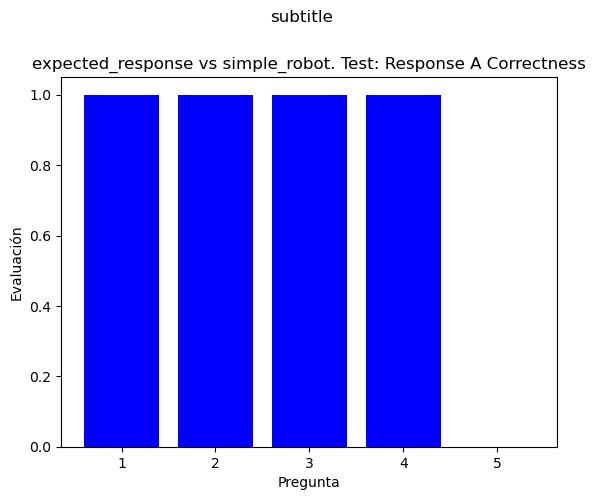

In [43]:
plot_bar_chart_for_test(json_data, target_test_id="2")


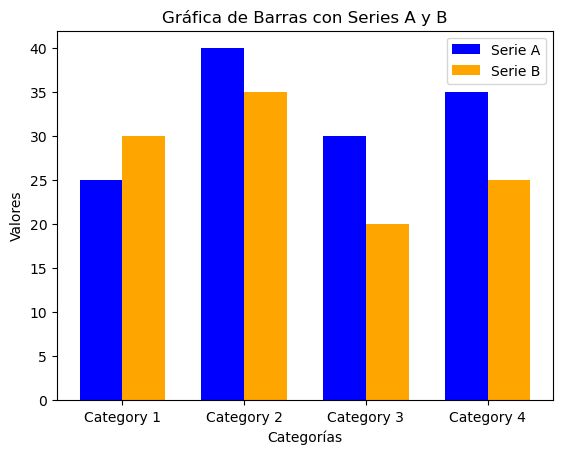

In [44]:
import matplotlib.pyplot as plt

# Datos de ejemplo para las series A y B
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
series_A = [25, 40, 30, 35]
series_B = [30, 35, 20, 25]

# Crear la gráfica de barras
bar_width = 0.35
index = range(len(categories))

fig, ax = plt.subplots()
bar_A = ax.bar(index, series_A, bar_width, label='Serie A', color='blue')
bar_B = ax.bar([i + bar_width for i in index], series_B, bar_width, label='Serie B', color='orange')

# Configurar etiquetas y título
ax.set_xlabel('Categorías')
ax.set_ylabel('Valores')
ax.set_title('Gráfica de Barras con Series A y B')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

# Mostrar la gráfica
plt.show()


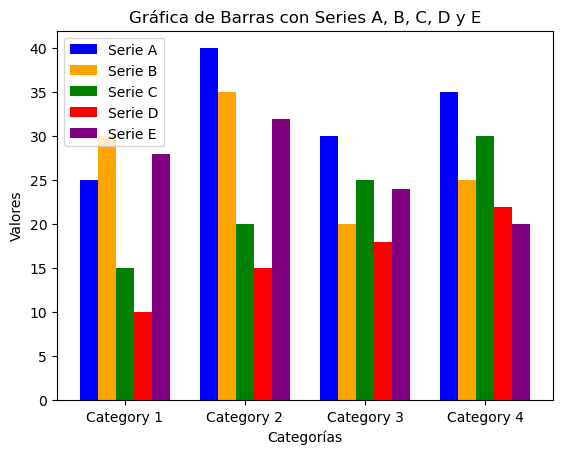

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo para las cinco series A, B, C, D y E
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
series_A = [25, 40, 30, 35]
series_B = [30, 35, 20, 25]
series_C = [15, 20, 25, 30]
series_D = [10, 15, 18, 22]
series_E = [28, 32, 24, 20]

# Crear la gráfica de barras
bar_width = 0.15
index = np.arange(len(categories))

fig, ax = plt.subplots()
bar_A = ax.bar(index, series_A, bar_width, label='Serie A', color='blue')
bar_B = ax.bar(index + bar_width, series_B, bar_width, label='Serie B', color='orange')
bar_C = ax.bar(index + 2 * bar_width, series_C, bar_width, label='Serie C', color='green')
bar_D = ax.bar(index + 3 * bar_width, series_D, bar_width, label='Serie D', color='red')
bar_E = ax.bar(index + 4 * bar_width, series_E, bar_width, label='Serie E', color='purple')

# Configurar etiquetas y título
ax.set_xlabel('Categorías')
ax.set_ylabel('Valores')
ax.set_title('Gráfica de Barras con Series A, B, C, D y E')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(categories)
ax.legend()

# Mostrar la gráfica
plt.show()


In [81]:
def extract_data_for_bar(json_data, target_test_id):
    df = pd.DataFrame(json_data["questions_answers"])
    if df.empty: 
        print(f"There is no data for 'questions_answers'")
    if df['evaluate_with_AOAI_result'].empty:
        print(f"There is no data for 'evaluate_with_AOAI_result'")
        
    x_values = df['id_question']
    y_values_str = df['evaluate_with_AOAI_result'].apply(lambda x: next(item['result'] for item in x if item['test_id'] == target_test_id))
    labels = df['evaluate_with_AOAI_result'].apply(lambda x: next(item['test'] for item in x if item['test_id'] == target_test_id))
    
    y_values = pd.to_numeric(y_values_str, errors='coerce').astype(int)
    
    return {
        'categories':x_values, 
        'series':y_values, 
        'label':labels.iloc[0], 
        'response_a':df['response_a'].iloc[0], 
        'response_b':df['response_b'].iloc[0]
    }

In [83]:
bar_data=extract_data_for_bar(json_data, target_test_id="2")
bar_data['series']

0    1
1    1
2    1
3    1
4    0
Name: evaluate_with_AOAI_result, dtype: int32

In [88]:
import numpy as np

def show_plot_similarity_correctnes_score(json_data):
    
    similarity_data = extract_data_for_bar(json_data, target_test_id="1")
    correctness_a = extract_data_for_bar(json_data, target_test_id="2")
    correctness_b = extract_data_for_bar(json_data, target_test_id="3")
    score_a = extract_data_for_bar(json_data, target_test_id="5")
    score_b = extract_data_for_bar(json_data, target_test_id="6")
    
    categories = similarity_data['categories']
    series_A = similarity_data['series']
    series_B = correctness_a['series']
    series_C = correctness_b['series']
    series_D = np.array(score_a['series'])/10
    series_E = np.array(score_b['series'])/10
    
    # Crear la gráfica de barras
    bar_width = 0.15
    index = np.arange(len(categories))
    
    fig, ax = plt.subplots()
    bar_A = ax.bar(index, series_A, bar_width, label=f"{similarity_data['label']}", color='blue')
    bar_B = ax.bar(index + bar_width, series_B, bar_width, label=f"{correctness_a['label']}", color='orange')
    bar_C = ax.bar(index + 2 * bar_width, series_C, bar_width, label=f"{correctness_b['label']}", color='green')
    bar_D = ax.bar(index + 3 * bar_width, series_D, bar_width, label=f"{score_a['label']}", color='red')
    bar_E = ax.bar(index + 4 * bar_width, series_E, bar_width, label=f"{score_b['label']}", color='purple')
    
    # Configurar etiquetas y título
    ax.set_xlabel('Preguntas')
    ax.set_ylabel('Evaluación')
    ax.set_title(f"A: {similarity_data['response_a']} vs B: {similarity_data['response_b']}")
    ax.set_xticks(index + 2 * bar_width)
    ax.set_xticklabels(categories)
    ax.legend()

    # Mostrar la gráfica
    plt.show()


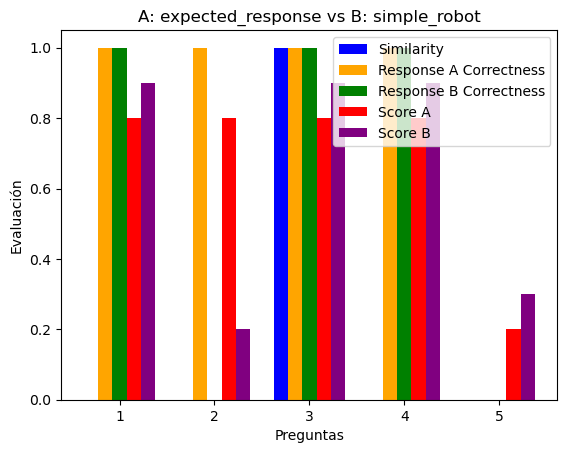

In [89]:
show_plot_similarity_correctnes_score(json_data)